In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

- IQR = Q3(3사분위수)-Q1(1사분위수)
- 제거기준 = (Q3 + IQR * 1.5 보다 큰 값) & (Q1 - IQR * 1.5 보다 작은 값)

In [266]:
coating = pd.read_csv("HQ_coating2.csv")
sheet_metal = pd.read_csv("HQ_sheet_metal2.csv")
exchange = pd.read_csv("HQ_exchange2.csv")

## Coating

In [267]:
coating.drop(coating[coating["HQ"]==100].index, axis=0, inplace=True)
coating.drop(coating[coating["HQ"]==0].index, axis=0, inplace=True)

## 1) damage

### 분포도 확인

Text(0.5, 1.0, 'coating')

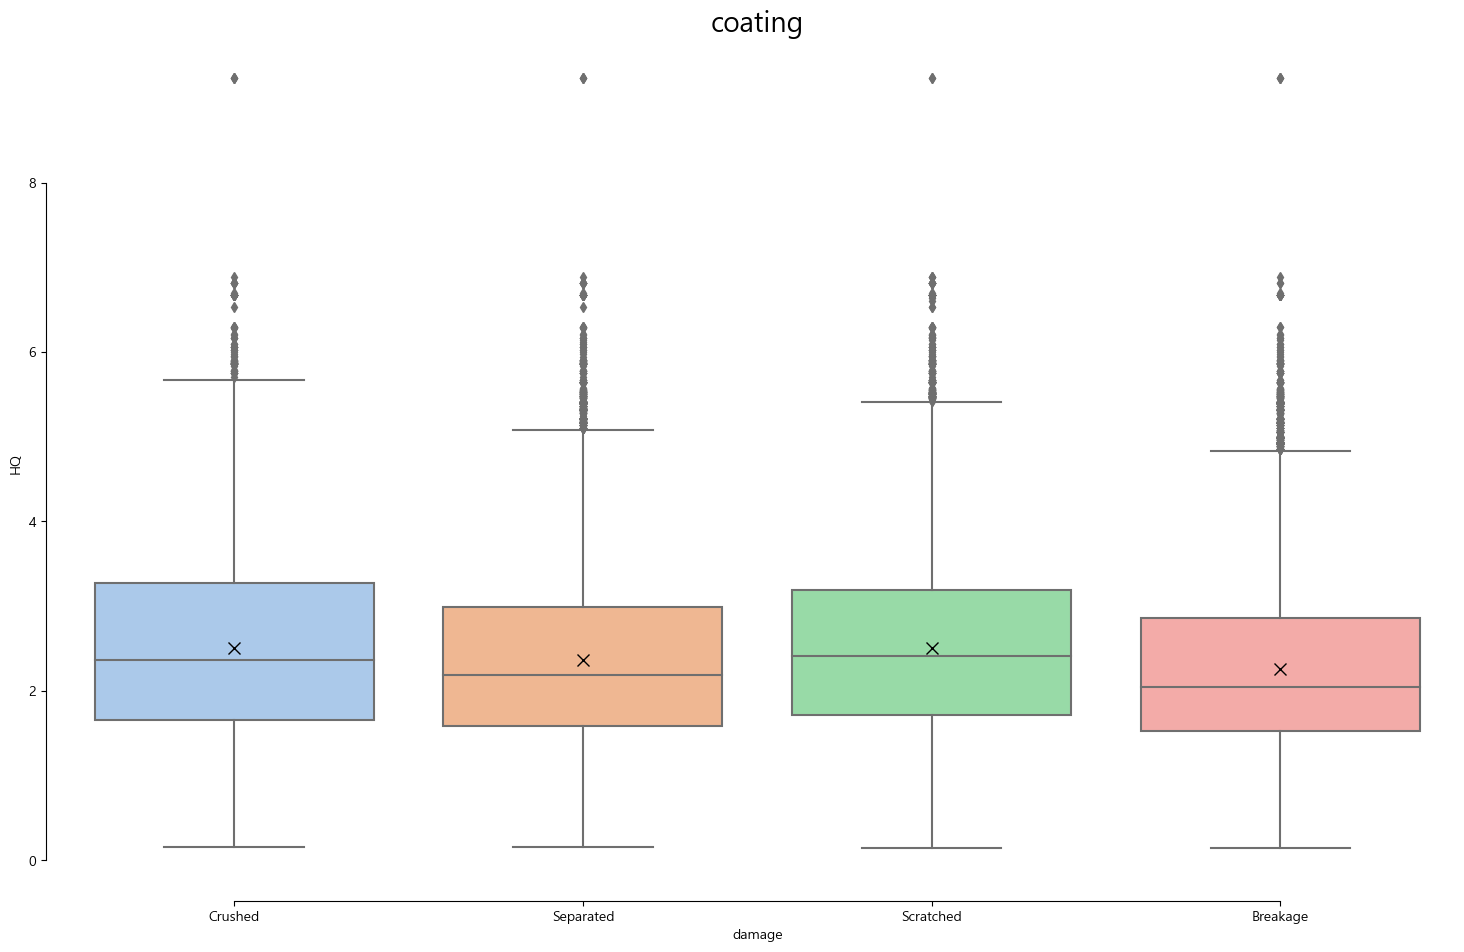

In [268]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=coating, x="damage", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

In [269]:
Crushed = coating[coating["damage"]=="Crushed"]
Separated = coating[coating["damage"]=="Separated"]
Scratched = coating[coating["damage"]=="Scratched"]
Breakage = coating[coating["damage"]=="Breakage"]


q1=Crushed.quantile(0.25)
q3=Crushed.quantile(0.75)
iqr=q3-q1
Crushed = Crushed[Crushed[Crushed[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Separated.quantile(0.25)
q3=Separated.quantile(0.75)
iqr=q3-q1
Separated = Separated[Separated[Separated[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Scratched.quantile(0.25)
q3=Scratched.quantile(0.75)
iqr=q3-q1
Scratched = Scratched[Scratched[Scratched[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Breakage.quantile(0.25)
q3=Breakage.quantile(0.75)
iqr=q3-q1
Breakage = Breakage[Breakage[Breakage[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]

HQ_coating = pd.concat([Crushed, Separated, Scratched, Breakage])
HQ_coating.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Bumper,Crushed,coating,VAN,1.97
3,as-0000025,Fender,Crushed,coating,VAN,2.80
6,as-0000025,Door,Crushed,coating,VAN,4.15
9,as-0000025,Door,Crushed,coating,VAN,4.56
12,as-0000025,Fender,Crushed,coating,VAN,3.26


Text(0.5, 1.0, 'coating')

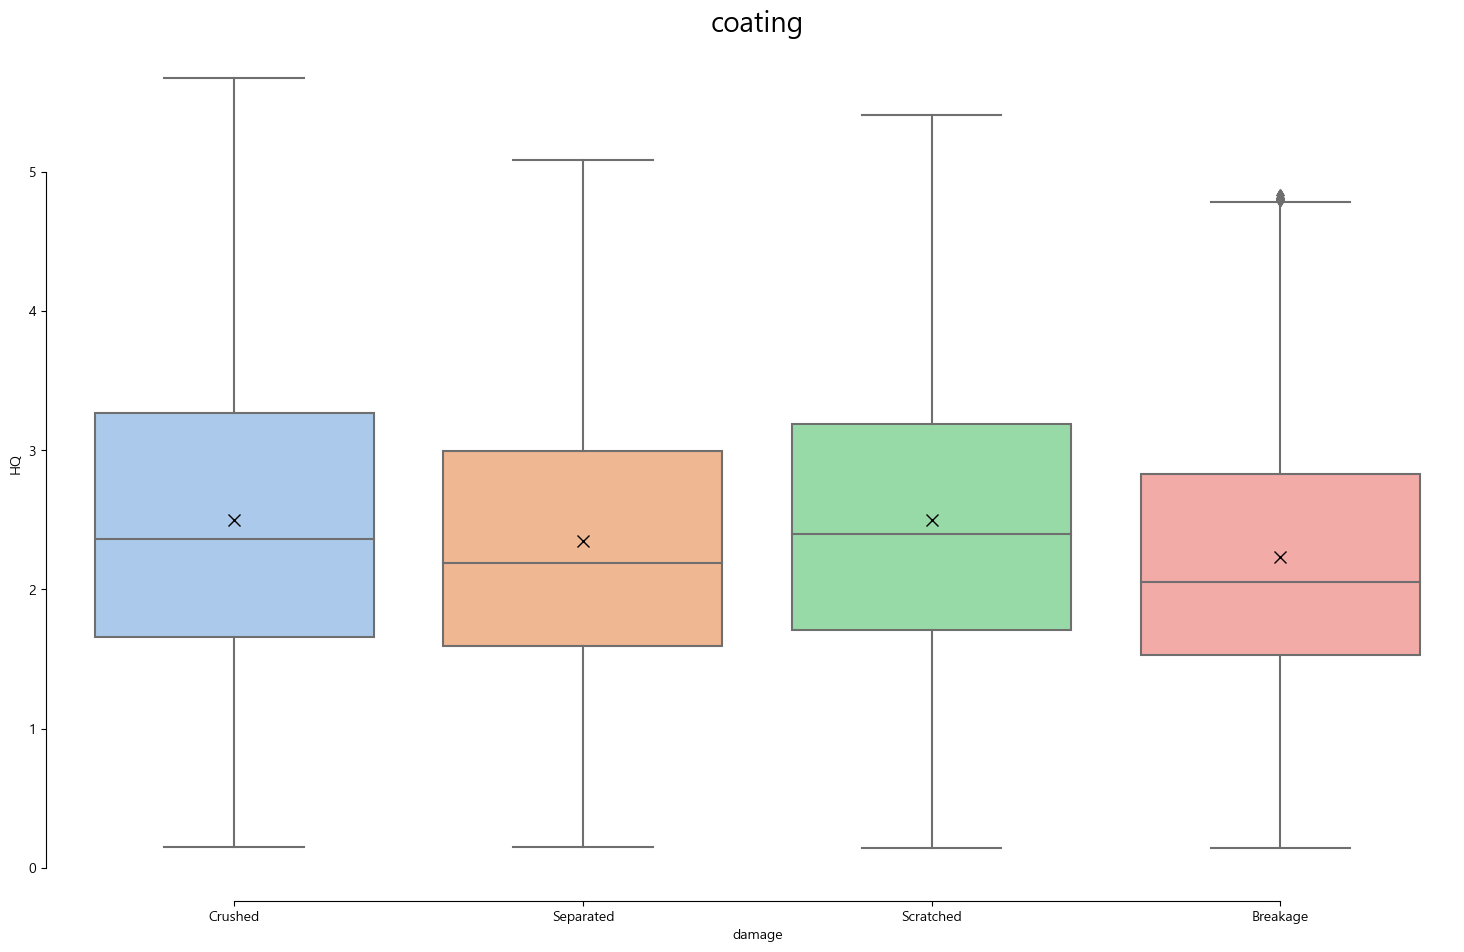

In [270]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_coating, x="damage", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

## 2) part

Text(0.5, 1.0, 'coating')

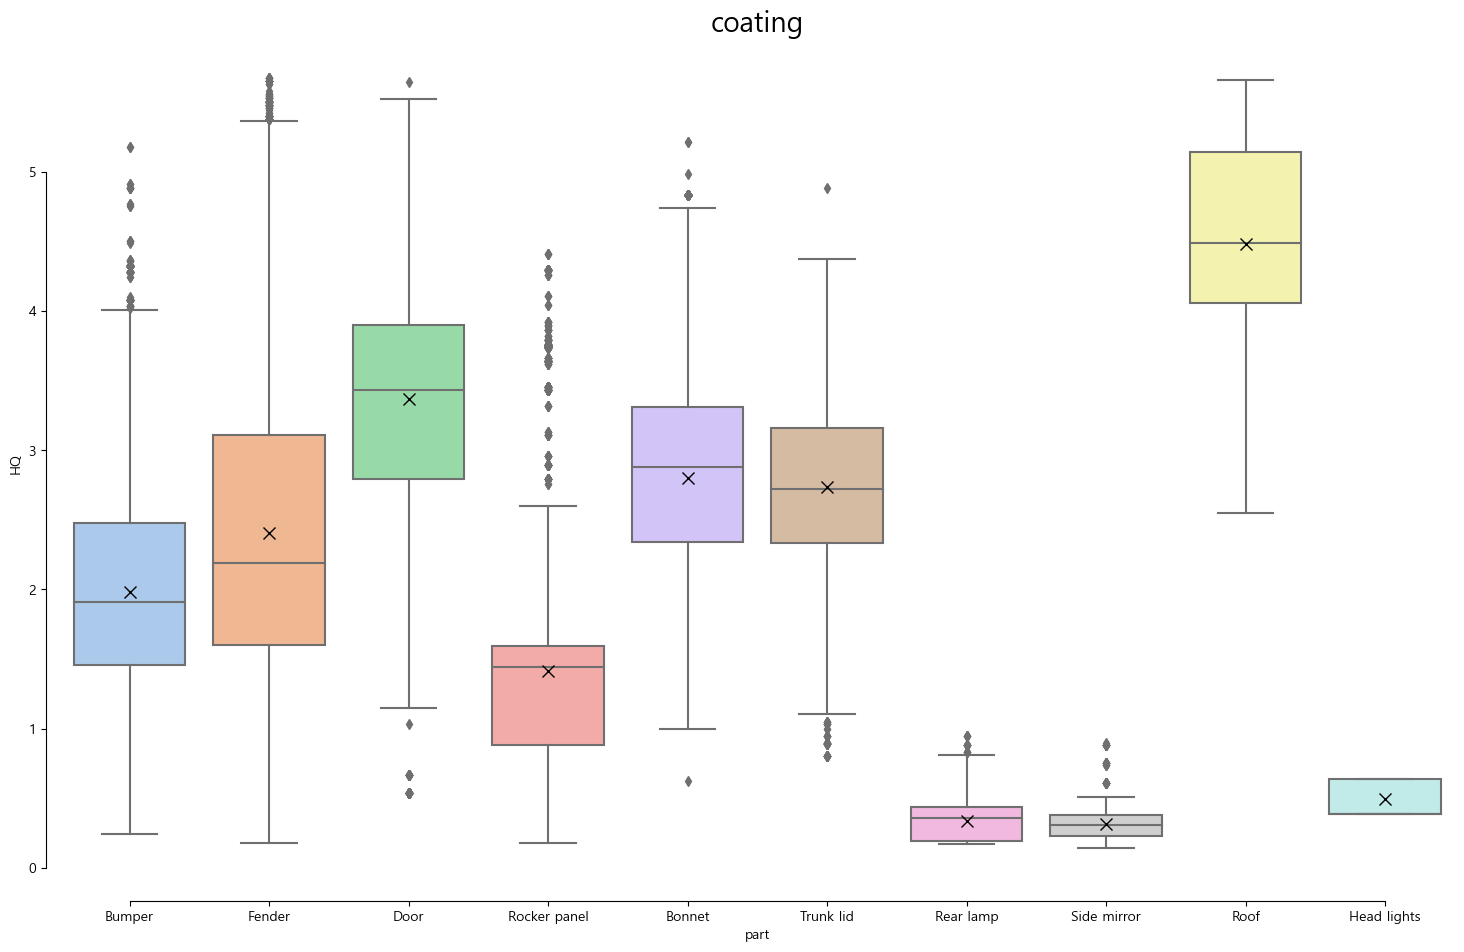

In [271]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_coating, x="part", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

In [272]:
Fender = HQ_coating[HQ_coating["part"]=="Fender"]
Rocker_panel = HQ_coating[HQ_coating["part"]=="Rocker panel"]
Bumper = HQ_coating[HQ_coating["part"]=="Bumper"]

q1=Fender.quantile(0.25)
q3=Fender.quantile(0.75)
iqr=q3-q1
Fender_idx = Fender[Fender[Fender[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index


q1=Rocker_panel.quantile(0.25)
q3=Rocker_panel.quantile(0.75)
iqr=q3-q1
Rocker_idx = Rocker_panel[Rocker_panel[Rocker_panel[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index


q1=Bumper.quantile(0.25)
q3=Bumper.quantile(0.75)
iqr=q3-q1
Bumper_idx = Bumper[Bumper[Bumper[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index

HQ_coating.drop(Fender_idx, axis=0, inplace=True)
HQ_coating.drop(Rocker_idx, axis=0, inplace=True)
HQ_coating.drop(Bumper_idx, axis=0, inplace=True)
HQ_coating.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Bumper,Crushed,coating,VAN,1.97
3,as-0000025,Fender,Crushed,coating,VAN,2.80
6,as-0000025,Door,Crushed,coating,VAN,4.15
9,as-0000025,Door,Crushed,coating,VAN,4.56
12,as-0000025,Fender,Crushed,coating,VAN,3.26


Text(0.5, 1.0, 'coating')

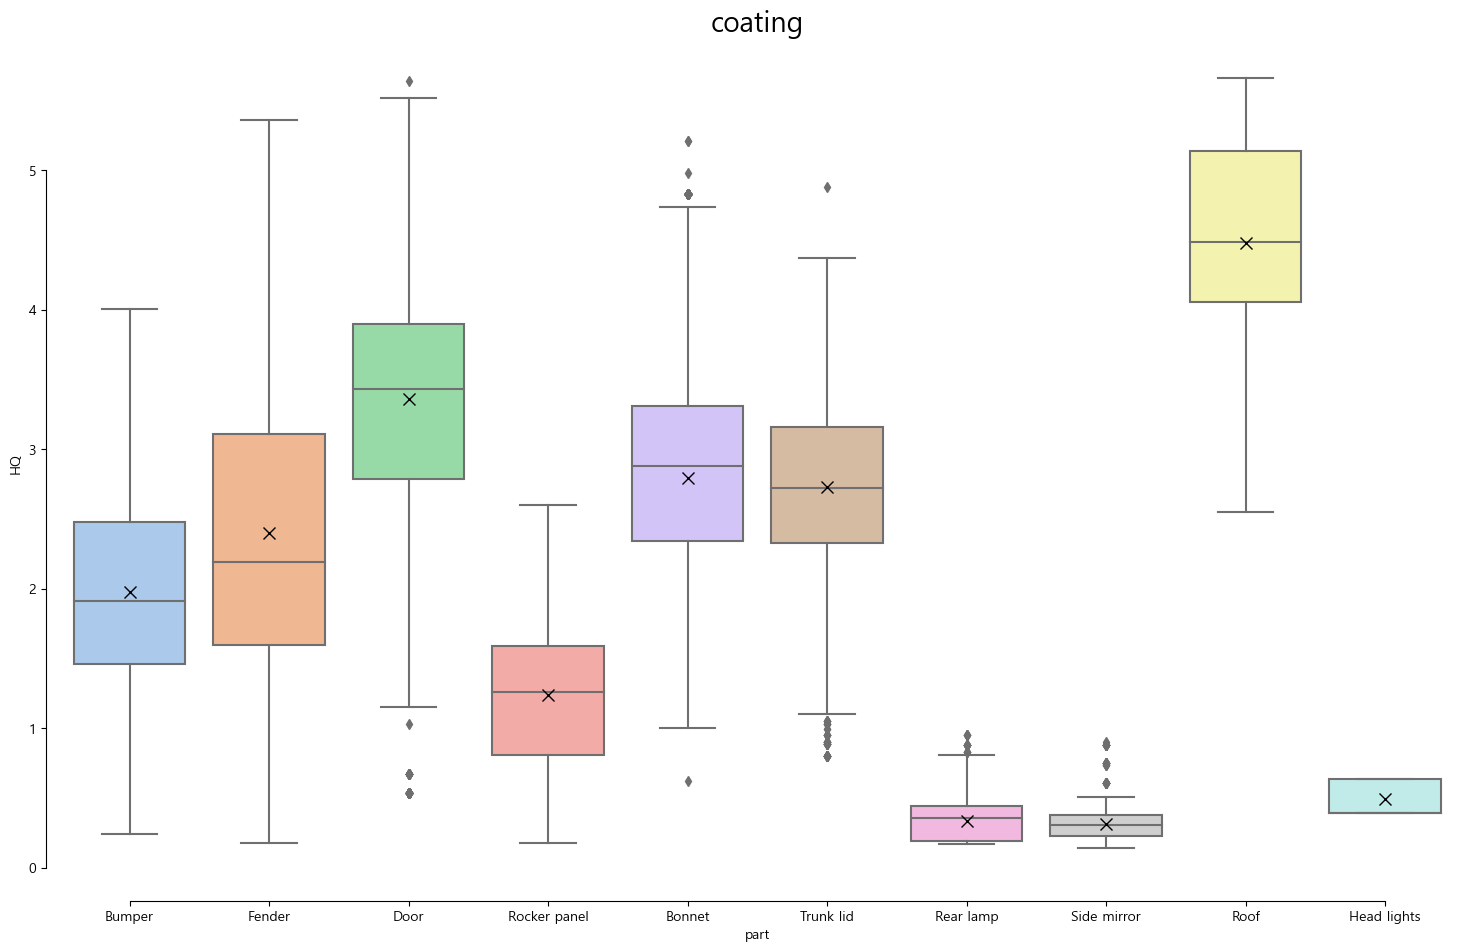

In [273]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_coating, x="part", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

# Sheet_matal

## 1) damage

In [274]:
sheet_metal.drop(coating[coating["HQ"]==100].index, axis=0, inplace=True)
sheet_metal.drop(coating[coating["HQ"]==0].index, axis=0, inplace=True)

Text(0.5, 1.0, 'sheet_metal')

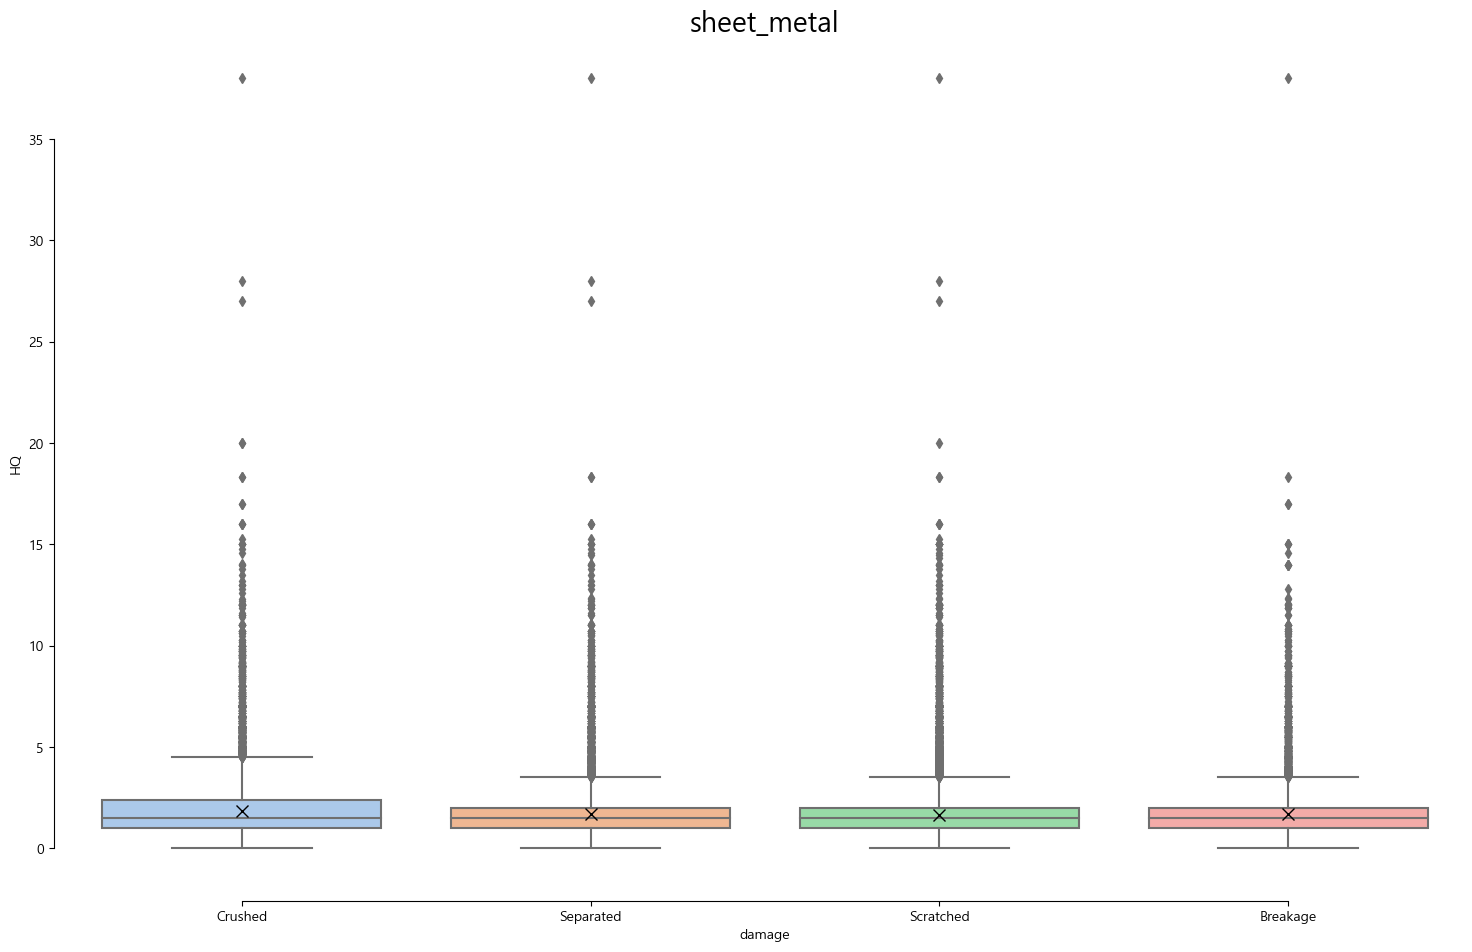

In [275]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=sheet_metal, x="damage", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('sheet_metal', size=20)

In [276]:
Crushed = sheet_metal[sheet_metal["damage"]=="Crushed"]
Separated = sheet_metal[sheet_metal["damage"]=="Separated"]
Scratched = sheet_metal[sheet_metal["damage"]=="Scratched"]
Breakage = sheet_metal[sheet_metal["damage"]=="Breakage"]


q1=Crushed.quantile(0.25)
q3=Crushed.quantile(0.75)
iqr=q3-q1
Crushed = Crushed[Crushed[Crushed[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Separated.quantile(0.25)
q3=Separated.quantile(0.75)
iqr=q3-q1
Separated = Separated[Separated[Separated[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Scratched.quantile(0.25)
q3=Scratched.quantile(0.75)
iqr=q3-q1
Scratched = Scratched[Scratched[Scratched[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Breakage.quantile(0.25)
q3=Breakage.quantile(0.75)
iqr=q3-q1
Breakage = Breakage[Breakage[Breakage[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]

HQ_sheet_metal = pd.concat([Crushed, Separated, Scratched, Breakage])
HQ_sheet_metal.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Fender,Crushed,sheet_metal,VAN,2.0
3,as-0000025,Door,Crushed,sheet_metal,VAN,1.5
7,as-0000027,Door,Crushed,sheet_metal,Mid-size car,2.5
10,as-0000027,Door,Crushed,sheet_metal,Mid-size car,3.5
12,as-0000027,Rocker panel,Crushed,sheet_metal,Mid-size car,2.5


Text(0.5, 1.0, 'HQ_sheet_metal')

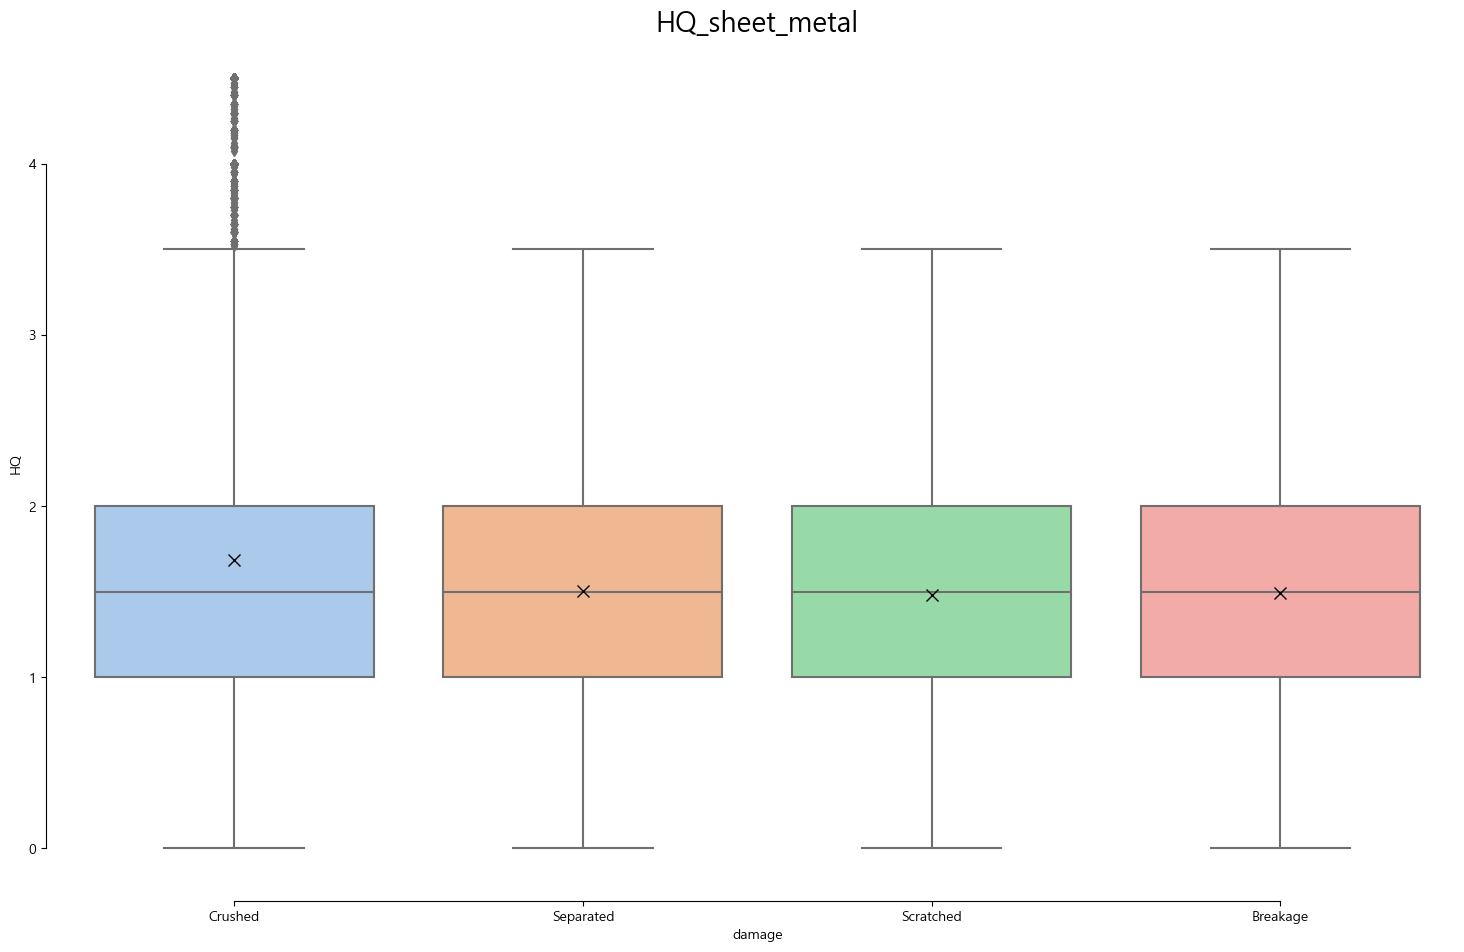

In [277]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_sheet_metal, x="damage", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('HQ_sheet_metal', size=20)

## 2) part

Text(0.5, 1.0, 'coating')

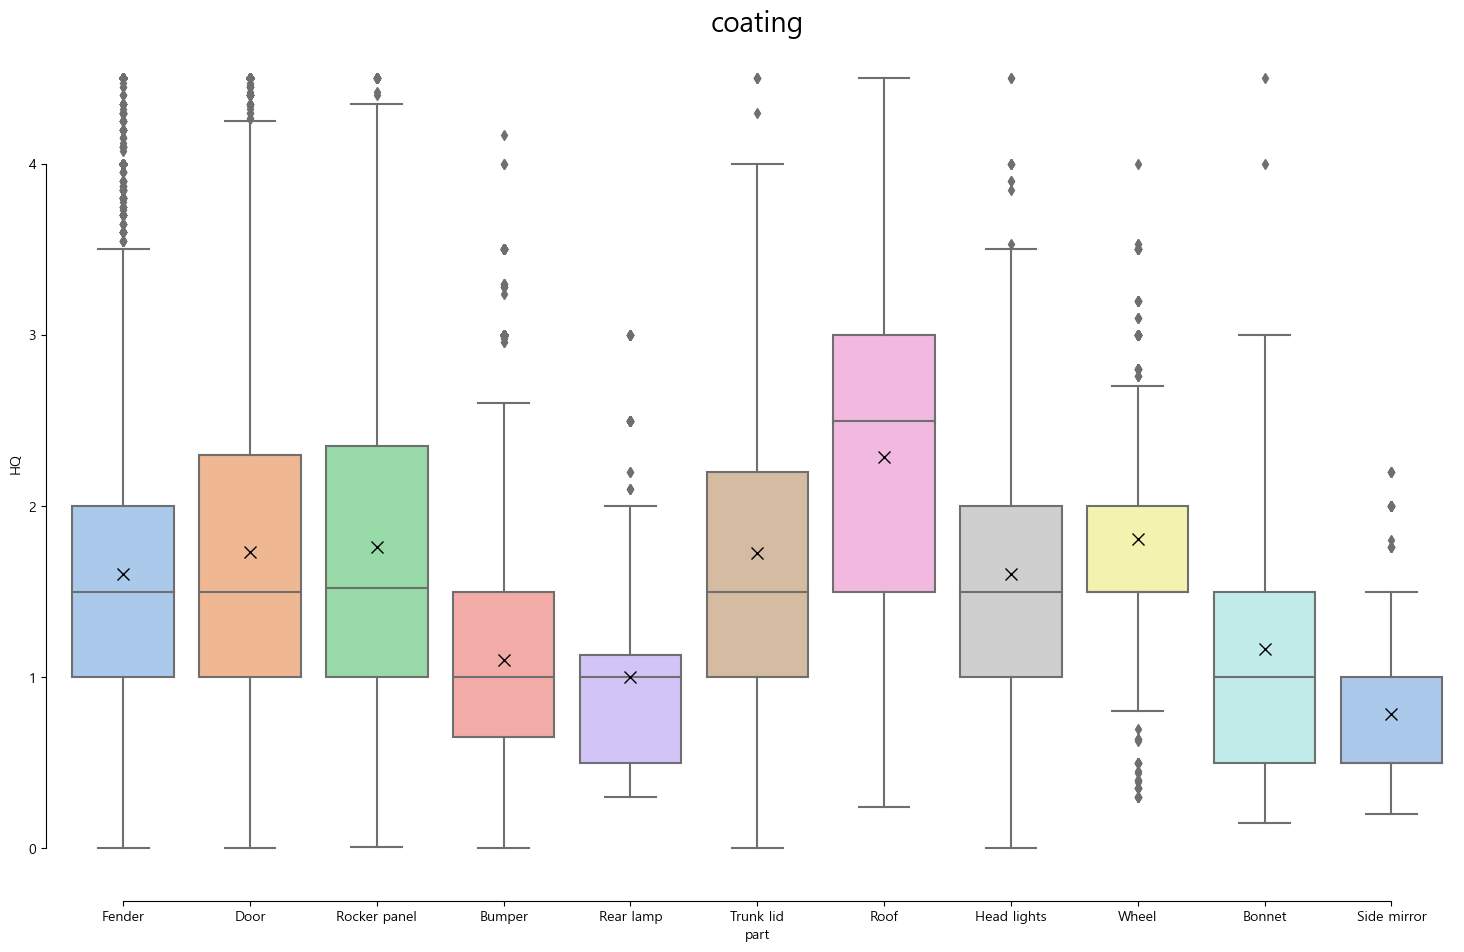

In [278]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_sheet_metal, x="part", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

In [279]:
Fender = HQ_sheet_metal[HQ_sheet_metal["part"]=="Fender"]
Bumper = HQ_sheet_metal[HQ_sheet_metal["part"]=="Bumper"]
Wheel = HQ_sheet_metal[HQ_sheet_metal["part"]=="Wheel"]
Bonnet = HQ_sheet_metal[HQ_sheet_metal["part"]=="Bonnet"]
Mirror = HQ_sheet_metal[HQ_sheet_metal["part"]=="Side mirror"]

q1=Fender.quantile(0.25)
q3=Fender.quantile(0.75)
iqr=q3-q1
HQ_sheet_metal.drop(Fender[Fender[Fender[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Bumper.quantile(0.25)
q3=Bumper.quantile(0.75)
iqr=q3-q1
HQ_sheet_metal.drop(Bumper[Bumper[Bumper[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Wheel.quantile(0.25)
q3=Wheel.quantile(0.75)
iqr=q3-q1
HQ_sheet_metal.drop(Wheel[Wheel[Wheel[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Bonnet.quantile(0.25)
q3=Bonnet.quantile(0.75)
iqr=q3-q1
HQ_sheet_metal.drop(Bonnet[Bonnet[Bonnet[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Mirror.quantile(0.25)
q3=Mirror.quantile(0.75)
iqr=q3-q1
HQ_sheet_metal.drop(Mirror[Mirror[Mirror[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

HQ_sheet_metal.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Fender,Crushed,sheet_metal,VAN,2.0
3,as-0000025,Door,Crushed,sheet_metal,VAN,1.5
7,as-0000027,Door,Crushed,sheet_metal,Mid-size car,2.5
10,as-0000027,Door,Crushed,sheet_metal,Mid-size car,3.5
12,as-0000027,Rocker panel,Crushed,sheet_metal,Mid-size car,2.5


Text(0.5, 1.0, 'coating')

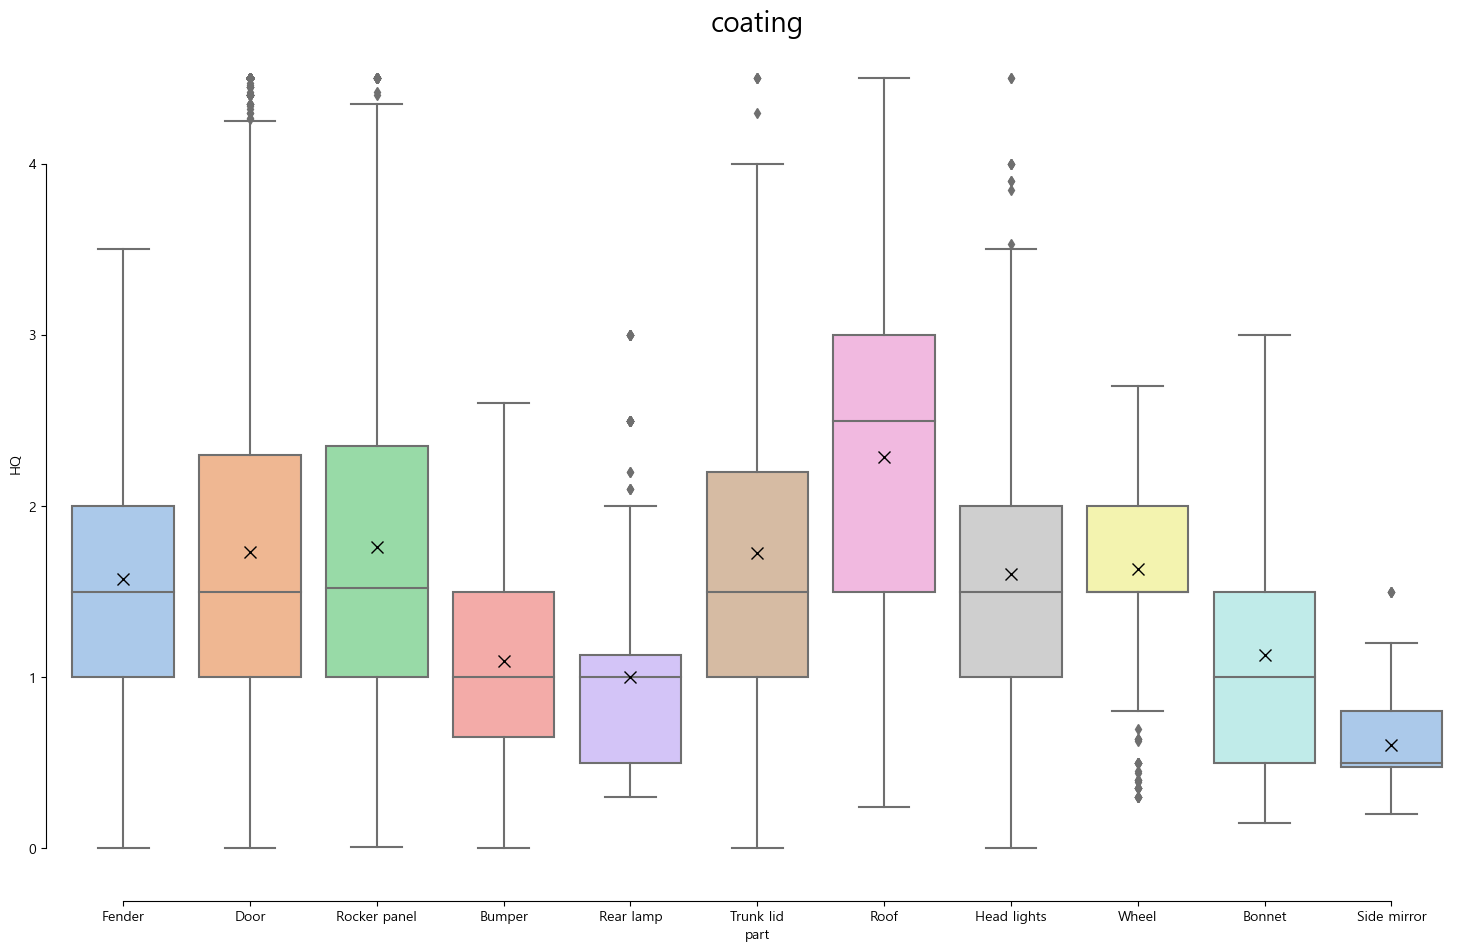

In [280]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_sheet_metal, x="part", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

# exchange

## 1) damage

In [281]:
exchange.drop(exchange[exchange["HQ"]==100].index, axis=0, inplace=True)
exchange.drop(exchange[exchange["HQ"]==0].index, axis=0, inplace=True)

Text(0.5, 1.0, 'exchange')

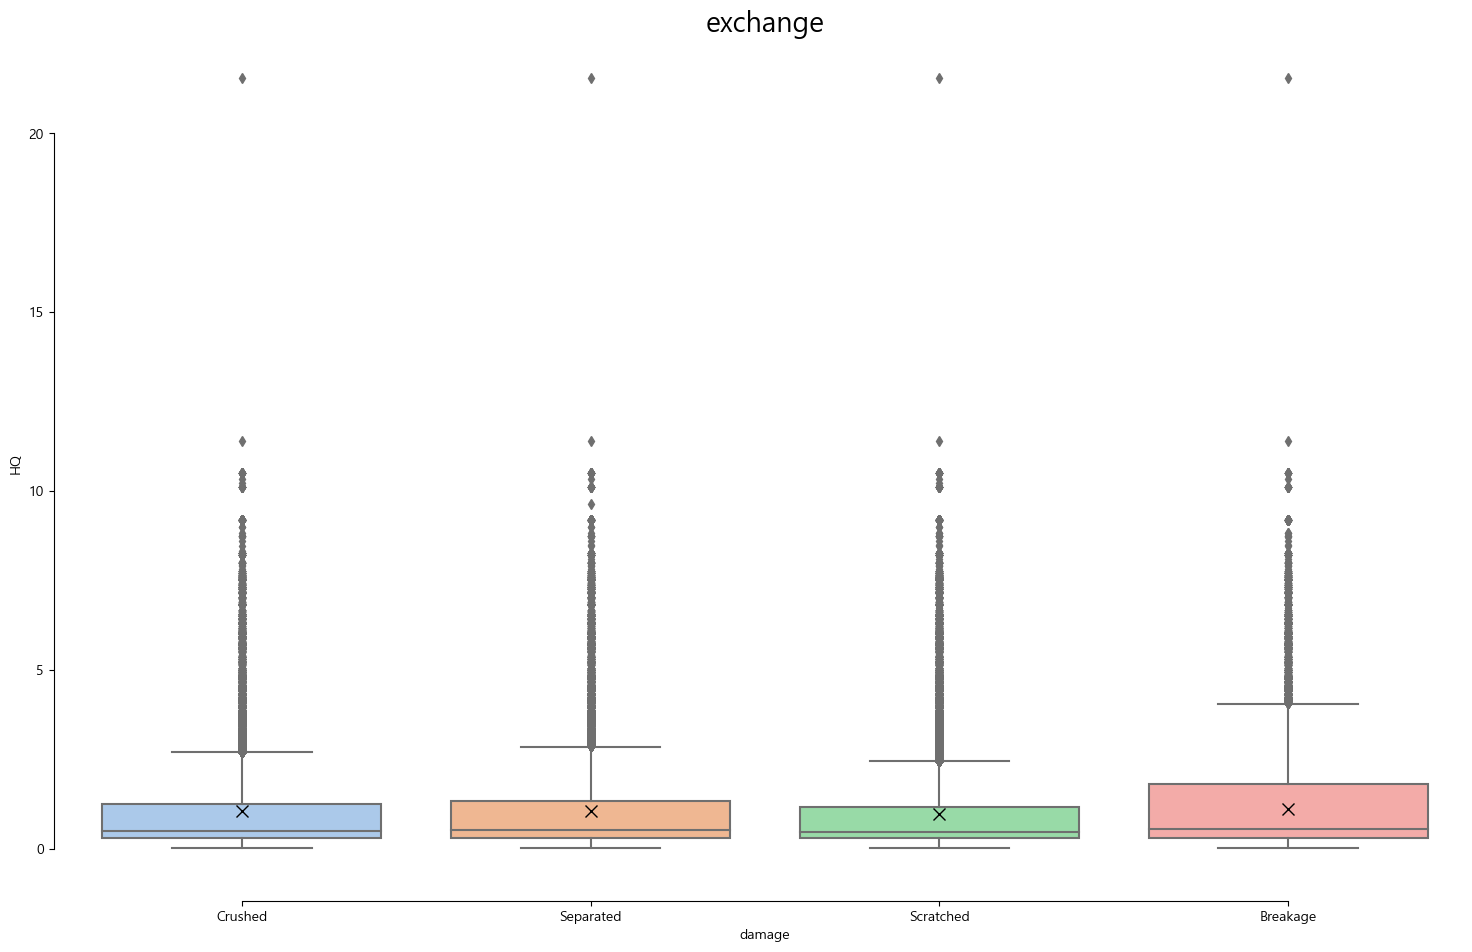

In [282]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=exchange, x="damage", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('exchange', size=20)

In [283]:
Crushed = exchange[exchange["damage"]=="Crushed"]
Separated = exchange[exchange["damage"]=="Separated"]
Scratched = exchange[exchange["damage"]=="Scratched"]
Breakage = exchange[exchange["damage"]=="Breakage"]


q1=Crushed.quantile(0.25)
q3=Crushed.quantile(0.75)
iqr=q3-q1
Crushed = Crushed[Crushed[Crushed[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Separated.quantile(0.25)
q3=Separated.quantile(0.75)
iqr=q3-q1
Separated = Separated[Separated[Separated[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Scratched.quantile(0.25)
q3=Scratched.quantile(0.75)
iqr=q3-q1
Scratched = Scratched[Scratched[Scratched[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]


q1=Breakage.quantile(0.25)
q3=Breakage.quantile(0.75)
iqr=q3-q1
Breakage = Breakage[Breakage[Breakage[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()!=True]

HQ_exchange = pd.concat([Crushed, Separated, Scratched, Breakage])
HQ_exchange.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Bumper,Crushed,exchange,VAN,1.79
3,as-0000025,Head lights,Crushed,exchange,VAN,0.44
6,as-0000025,Wheel,Crushed,exchange,VAN,0.70
9,as-0000027,Wheel,Crushed,exchange,Mid-size car,0.28
14,as-0000027,Wheel,Crushed,exchange,Mid-size car,0.50


Text(0.5, 1.0, 'HQ_exchange')

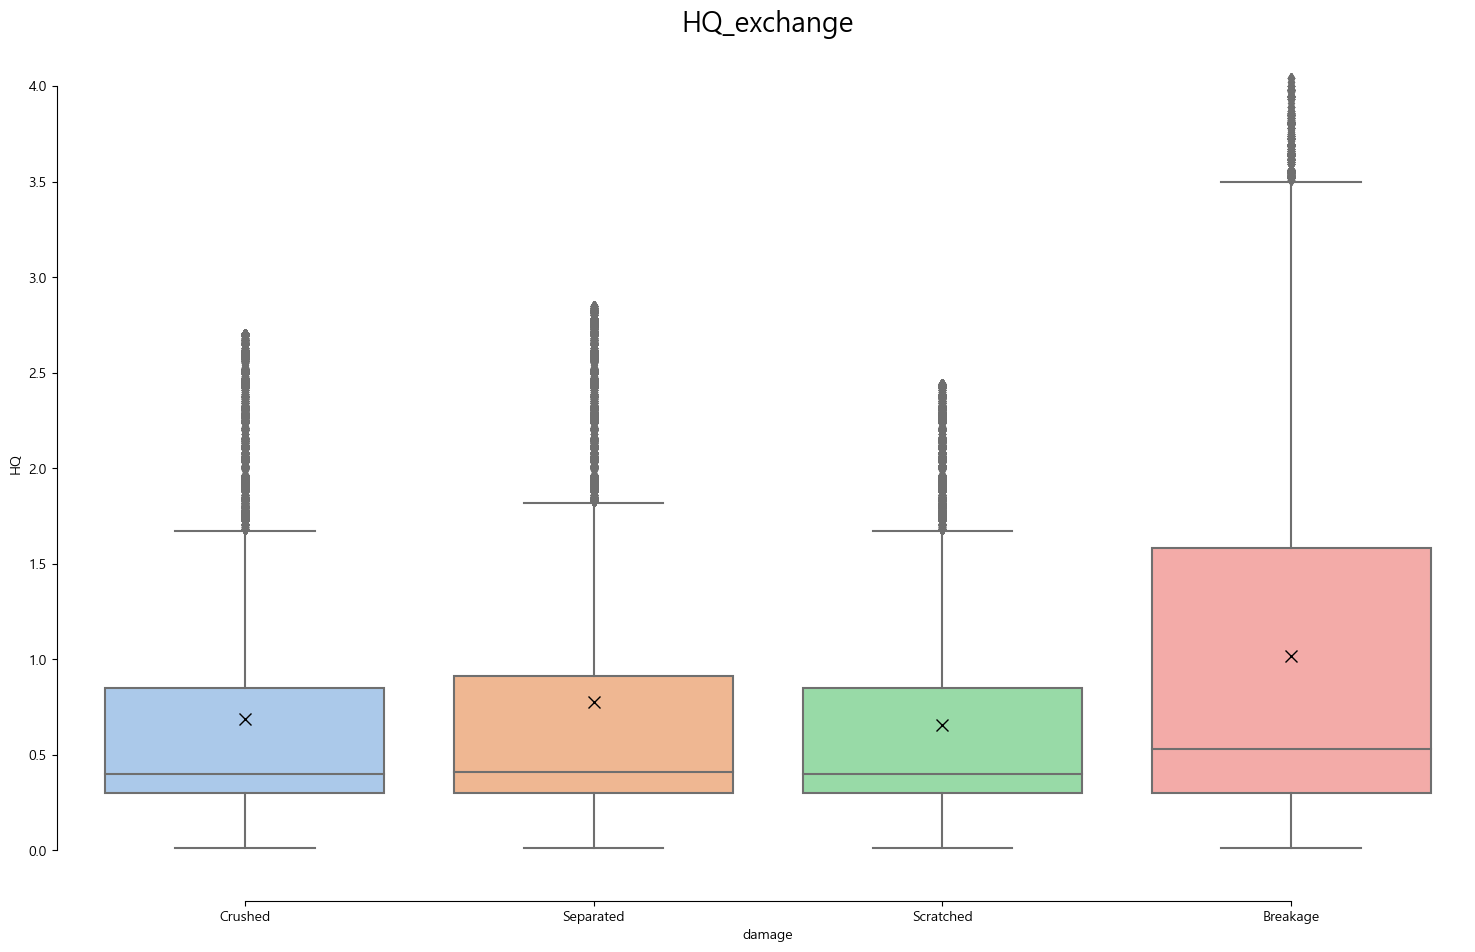

In [284]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_exchange, x="damage", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('HQ_exchange', size=20)

## 2) part

Text(0.5, 1.0, 'coating')

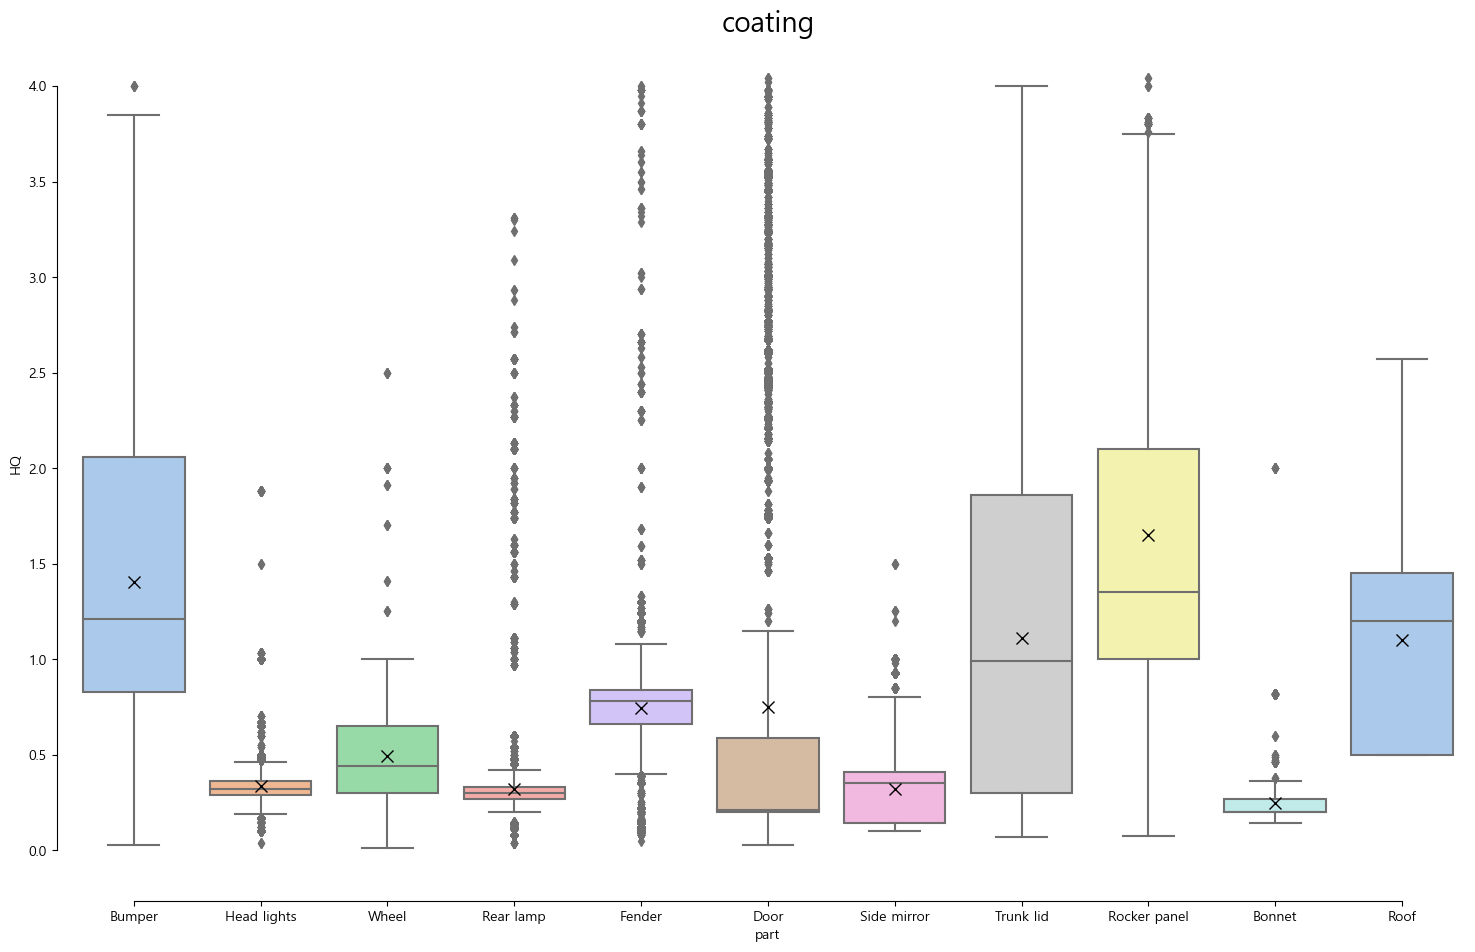

In [285]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_exchange, x="part", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

In [286]:
Head_light = HQ_exchange[HQ_exchange["part"]=="Head lights"]
Lamp = HQ_exchange[HQ_exchange["part"]=="Rear lamp"]
Wheel = HQ_exchange[HQ_exchange["part"]=="Wheel"]
Fender = HQ_exchange[HQ_exchange["part"]=="Fender"]
Door = HQ_exchange[HQ_exchange["part"]=="Door"]
Boonet = HQ_exchange[HQ_exchange["part"]=="Boonet"]

q1=Head_light.quantile(0.25)
q3=Head_light.quantile(0.75)
iqr=q3-q1
HQ_exchange.drop(Head_light[Head_light[Head_light[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Lamp.quantile(0.25)
q3=Lamp.quantile(0.75)
iqr=q3-q1
HQ_exchange.drop(Lamp[Lamp[Lamp[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Wheel.quantile(0.25)
q3=Wheel.quantile(0.75)
iqr=q3-q1
HQ_exchange.drop(Wheel[Wheel[Wheel[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Fender.quantile(0.25)
q3=Fender.quantile(0.75)
iqr=q3-q1
HQ_exchange.drop(Fender[Fender[Fender[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Door.quantile(0.25)
q3=Door.quantile(0.75)
iqr=q3-q1
HQ_exchange.drop(Door[Door[Door[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

q1=Boonet.quantile(0.25)
q3=Boonet.quantile(0.75)
iqr=q3-q1
HQ_exchange.drop(Boonet[Boonet[Boonet[['HQ']] <= (q3 + 1.5*iqr)]["HQ"].isnull()==True].index,
                    axis=0, inplace=True)

HQ_exchange.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Bumper,Crushed,exchange,VAN,1.79
3,as-0000025,Head lights,Crushed,exchange,VAN,0.44
6,as-0000025,Wheel,Crushed,exchange,VAN,0.70
9,as-0000027,Wheel,Crushed,exchange,Mid-size car,0.28
14,as-0000027,Wheel,Crushed,exchange,Mid-size car,0.50


Text(0.5, 1.0, 'coating')

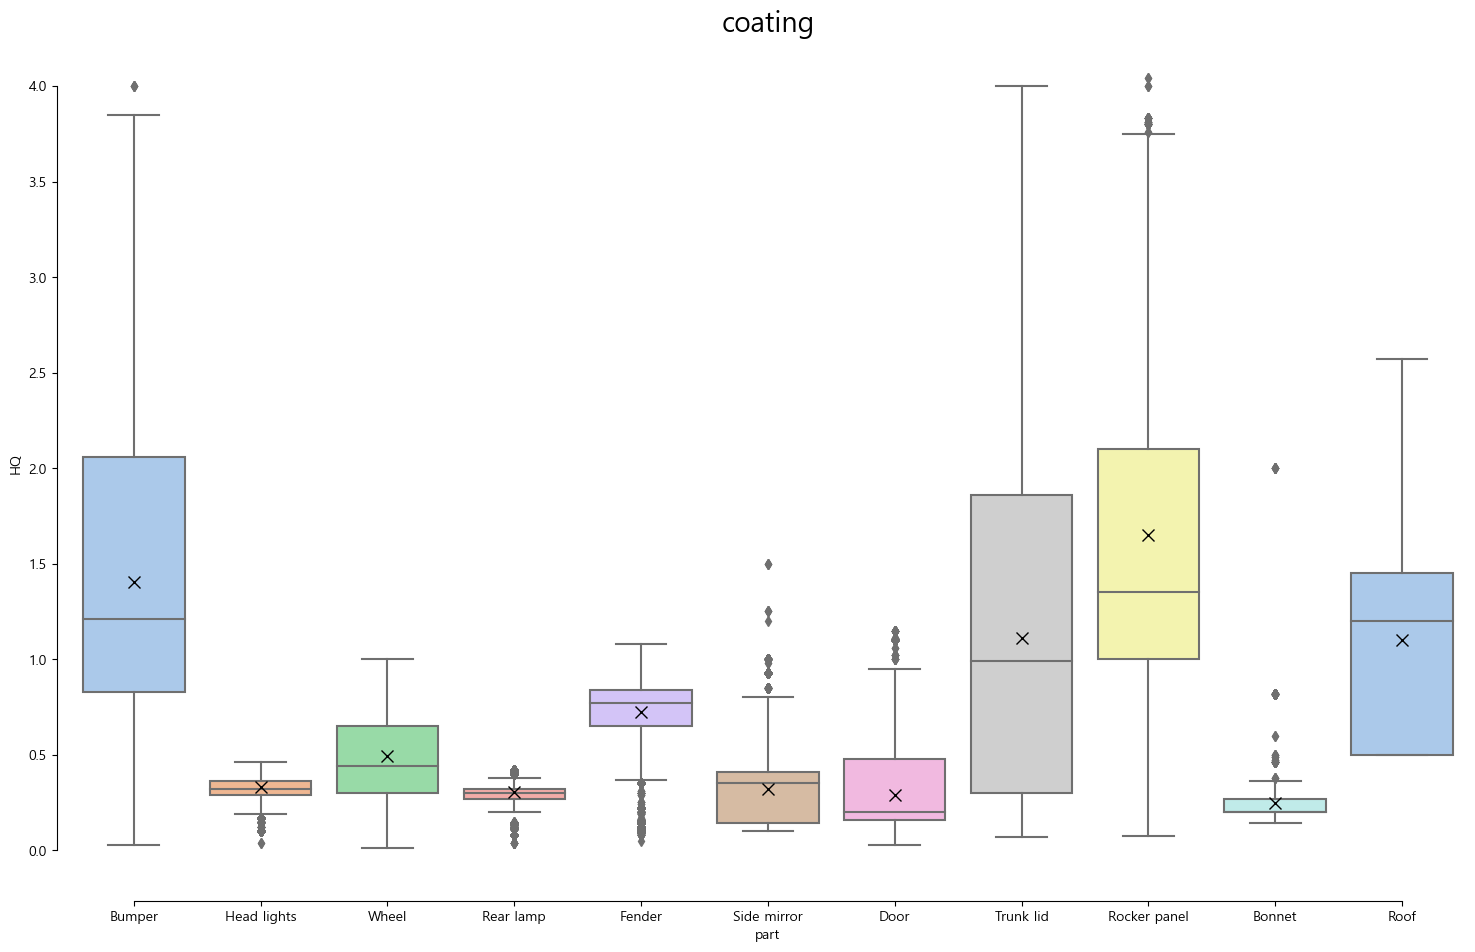

In [287]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=HQ_exchange, x="part", y='HQ', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('coating', size=20)

# 분류 모델을 위해 HQ 범위 나누기

<AxesSubplot:xlabel='HQ', ylabel='Count'>

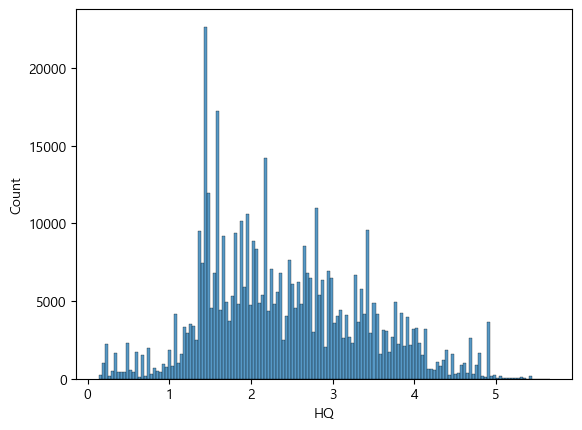

In [288]:
sns.histplot(HQ_coating["HQ"])

In [306]:
HQ_coating["HQ"] = HQ_coating["HQ"].apply(np.ceil).astype({"HQ":"int"})
HQ_coating.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Bumper,Crushed,coating,VAN,2
3,as-0000025,Fender,Crushed,coating,VAN,3
6,as-0000025,Door,Crushed,coating,VAN,5
9,as-0000025,Door,Crushed,coating,VAN,5
12,as-0000025,Fender,Crushed,coating,VAN,4


<AxesSubplot:xlabel='HQ', ylabel='Count'>

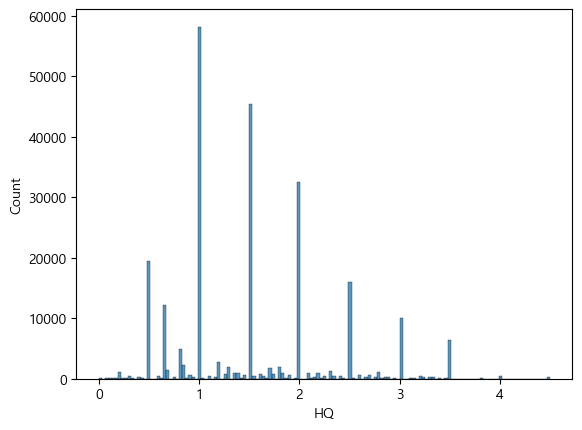

In [186]:
sns.histplot(HQ_sheet_metal["HQ"])

In [307]:
HQ_sheet_metal["HQ"] = HQ_sheet_metal["HQ"].apply(np.ceil).astype({"HQ":"int"})
HQ_sheet_metal.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Fender,Crushed,sheet_metal,VAN,2
3,as-0000025,Door,Crushed,sheet_metal,VAN,2
7,as-0000027,Door,Crushed,sheet_metal,Mid-size car,3
10,as-0000027,Door,Crushed,sheet_metal,Mid-size car,4
12,as-0000027,Rocker panel,Crushed,sheet_metal,Mid-size car,3


<AxesSubplot:xlabel='HQ', ylabel='Count'>

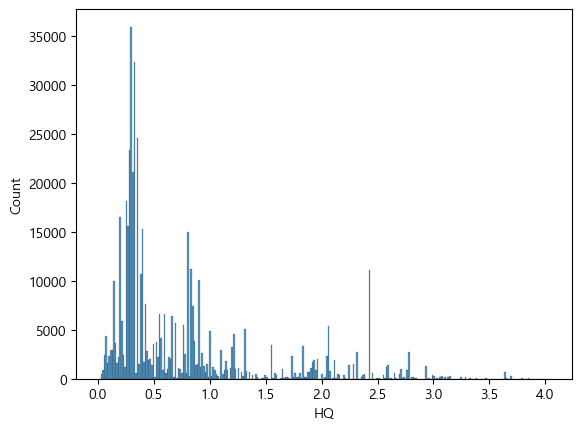

In [254]:
sns.histplot(HQ_exchange["HQ"])

In [308]:
HQ_exchange["HQ"] = HQ_exchange["HQ"].apply(np.ceil).astype({"HQ":"int"})
HQ_exchange.head()

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Bumper,Crushed,exchange,VAN,2
3,as-0000025,Head lights,Crushed,exchange,VAN,1
6,as-0000025,Wheel,Crushed,exchange,VAN,1
9,as-0000027,Wheel,Crushed,exchange,Mid-size car,1
14,as-0000027,Wheel,Crushed,exchange,Mid-size car,1


In [309]:
HQ_coating.to_csv("HQ_coating.csv", index=True)
HQ_sheet_metal.to_csv("HQ_sheet_metal.csv", index=True)
HQ_exchange.to_csv("HQ_exchange.csv", index=True)